In [12]:
%matplotlib inline
import json
import os
import sys
import matplotlib.pylab as plt
import linecache
import numpy as np
import time

# 显示top-1 failed 情况

In [13]:
with open("../data/result.json",'r') as load_f:
    results = json.load(load_f)
#     print(result)

In [14]:
def read_data_row(path, num):
    return linecache.getline(path, num)


def get_line(path, num):
    file0 = read_data_row(path, 1).strip().split(" ")
    line0 = np.array(list(map(int, file0[num].split(','))))
    return line0

*************failed********************


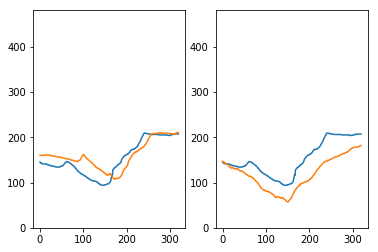

220.0.txt
['6.0.txt', '129.0.txt', '522.0.txt', '200.0.txt', '417.0.txt', '413.0.txt', '629.0.txt', '704.0.txt', '186.0.txt', '252.0.txt']
*************failed********************


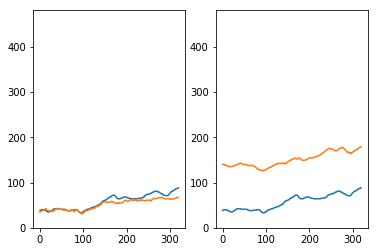

38.0.txt
['716.0.txt', '50.0.txt', '38.0.txt', '453.0.txt', '454.0.txt', '62.0.txt', '57.0.txt', '351.0.txt', '354.0.txt', '120.0.txt']
*************failed********************


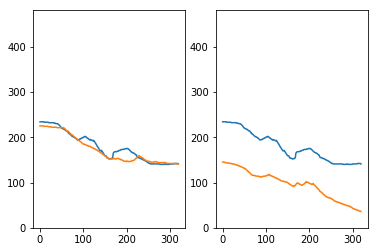

721.0.txt
['322.0.txt', '168.0.txt', '548.0.txt', '482.0.txt', '378.0.txt', '581.0.txt', '405.0.txt', '194.0.txt', '242.0.txt', '187.0.txt']
*************failed********************


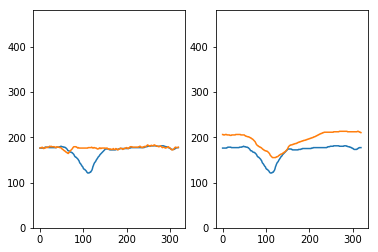

437.0.txt
['482.0.txt', '433.0.txt', '49.0.txt', '437.0.txt', '290.0.txt', '749.0.txt', '334.0.txt', '702.0.txt', '269.0.txt', '38.0.txt']
*************failed********************


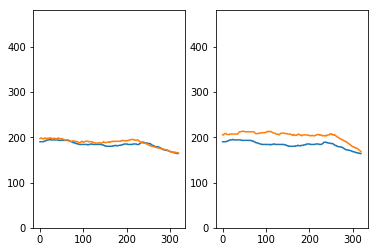

616.0.txt
['736.0.txt', '616.0.txt', '188.0.txt', '42.0.txt', '720.0.txt', '122.0.txt', '426.0.txt', '140.0.txt', '68.0.txt', '228.0.txt']
*************failed********************


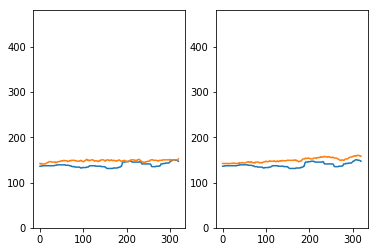

542.0.txt
['119.0.txt', '383.0.txt', '646.0.txt', '541.0.txt', '430.0.txt', '402.0.txt', '42.0.txt', '183.0.txt', '641.0.txt', '448.0.txt']
*************failed********************


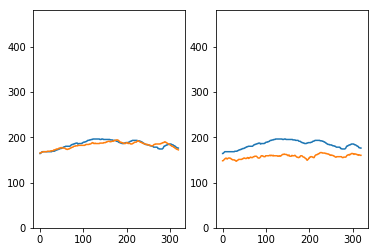

477.0.txt
['380.0.txt', '432.0.txt', '179.0.txt', '330.0.txt', '162.0.txt', '634.0.txt', '693.0.txt', '477.0.txt', '392.0.txt', '631.0.txt']
*************failed********************


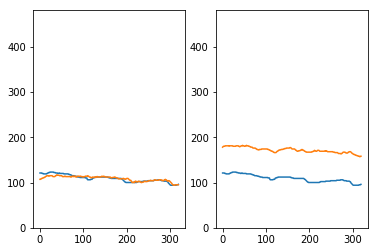

708.0.txt
['668.0.txt', '304.0.txt', '708.0.txt', '562.0.txt', '689.0.txt', '52.0.txt', '20.0.txt', '42.0.txt', '575.0.txt', '405.0.txt']
*************failed********************


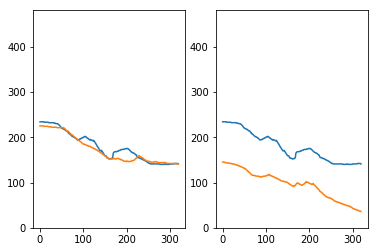

721.0.txt
['322.0.txt', '168.0.txt', '548.0.txt', '482.0.txt', '378.0.txt', '581.0.txt', '405.0.txt', '194.0.txt', '242.0.txt', '187.0.txt']
*************failed********************


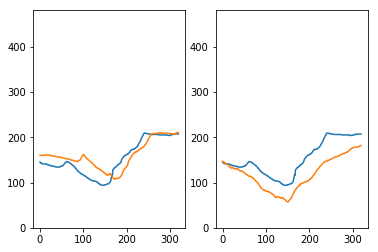

220.0.txt
['6.0.txt', '129.0.txt', '522.0.txt', '200.0.txt', '417.0.txt', '413.0.txt', '629.0.txt', '704.0.txt', '186.0.txt', '252.0.txt']
*************failed********************


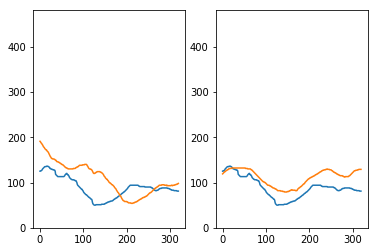

545.0.txt
['639.0.txt', '352.0.txt', '409.0.txt', '260.0.txt', '51.0.txt', '113.0.txt', '359.0.txt', '721.0.txt', '607.0.txt', '697.0.txt']
*************failed********************


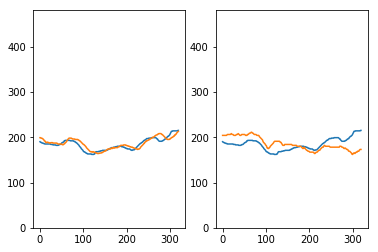

186.0.txt
['290.0.txt', '190.0.txt', '186.0.txt', '137.0.txt', '24.0.txt', '716.0.txt', '586.0.txt', '184.0.txt', '258.0.txt', '235.0.txt']
*************failed********************


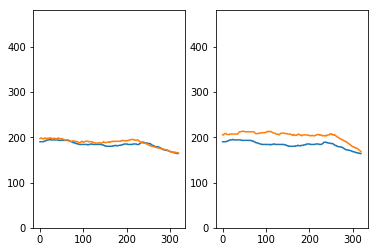

616.0.txt
['736.0.txt', '616.0.txt', '188.0.txt', '42.0.txt', '720.0.txt', '122.0.txt', '426.0.txt', '140.0.txt', '68.0.txt', '228.0.txt']
*************failed********************


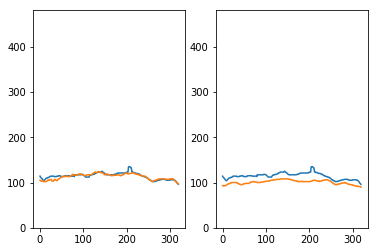

179.0.txt
['557.0.txt', '179.0.txt', '225.0.txt', '325.0.txt', '715.0.txt', '562.0.txt', '726.0.txt', '684.0.txt', '276.0.txt', '414.0.txt']


In [15]:
path = "../data/test"
for result in results:
    if result["status"] == "failed":
        line_t_i = get_line(os.path.join(path, result["filenames"][result["target"]]), 0)
        line_t_d = get_line(os.path.join(path, result["filenames"][result["target"]]), 1)
        line_w_d = get_line(os.path.join(path, result["filenames"][result["dist"][0]]), 1)
        
        print('*************failed********************')
        plt.figure()
        plt.subplot(121)
        plt.plot(line_t_i)
        plt.plot(line_t_d)
        plt.ylim(0,480)
        plt.subplot(122)
        plt.plot(line_t_i)
        plt.plot(line_w_d)
        plt.ylim(0,480)
        plt.show()
        
        print(result["filenames"][result["target"]])
        print([result["filenames"][i] for i in result["dist"][:10]])
        
        

# 显示loss曲线、acc曲线

In [5]:
def read_txt_loss(filename):
    with open(filename, 'r') as file_to_read:
        list0 = [] #文件中的第一列数据
        while True:
            lines = file_to_read.readline()  # 整行读取数据
            if not lines:
                break
            item = float(lines.strip().split(' ')[1].split(':')[1])
            list0.append(item)
    return list0

(0, 1)

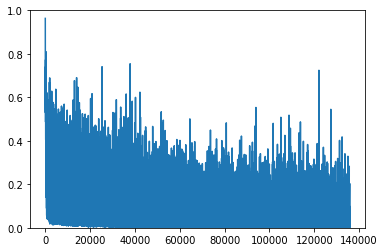

In [7]:
filename = os.path.join("../checkpoint/new2/train.log")
list0 = read_txt_loss(filename)
plt.plot(list0)
plt.ylim(0,1)

In [8]:
def read_txt_acc(filename):
    with open(filename, 'r') as file_to_read:
        list0 = [] 
        while True:
            lines = file_to_read.readline()  # 整行读取数据
            if not lines:
                break
            item = float(lines.strip().split(' ')[1])
            list0.append(item)
    return list0

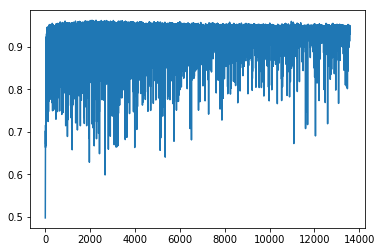

In [20]:
filename = os.path.join("../checkpoint/new2/valid.log")
list_acc = read_txt_acc(filename)
plt.plot(([]+list_acc))